In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [6]:
Traffic_Accidents22 = pd.read_csv('../data/Traffic_Accidents.csv')
print(Traffic_Accidents22.shape)
Traffic_Accidents22.head(3)

(5053, 15)


,Accident Number,Date and Time,Number of Fatalities,Property Damage,Hit and Run,Collision Type Description,Street Address,City,State,ZIP,RPA,Precinct,Latitude,Longitude,Mapped Location
0,20220001516,1/2/2022 2:20,0,NaN,True,UNKNOWN,MM 87 3 I 65,NASHVILLE,TN,37207.0,1804.0,EAST,36.2068,-86.7762,POINT (-86.7762 36.2068)
1,20220003611,1/3/2022 17:45,0,NaN,False,Front to Rear,MM 49 0 I 24,NASHVILLE,TN,37206.0,10040.0,EAST,36.1664,-86.7647,POINT (-86.7647 36.1664)
2,20220001038,1/1/2022 16:51,0,NaN,True,Front to Rear,EDMONDSON PKE & WALLACE RD,NASHVILLE,TN,37211.0,8661.0,MIDTOW,36.0771,-86.7256,POINT (-86.7256 36.0771)


In [7]:
Traffic_Accidents22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5053 entries, 0 to 5052
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Accident Number             5053 non-null   int64  
 1   Date and Time               5053 non-null   object 
 2   Number of Fatalities        5053 non-null   int64  
 3   Property Damage             443 non-null    object 
 4   Hit and Run                 5052 non-null   object 
 5   Collision Type Description  5053 non-null   object 
 6   Street Address              5053 non-null   object 
 7   City                        5053 non-null   object 
 8   State                       5053 non-null   object 
 9   ZIP                         5050 non-null   float64
 10  RPA                         5052 non-null   float64
 11  Precinct                    5052 non-null   object 
 12  Latitude                    4990 non-null   float64
 13  Longitude                   4990 

In [18]:
zipcodes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   zip       56 non-null     object  
 1   po_name   56 non-null     object  
 2   geometry  56 non-null     geometry
dtypes: geometry(1), object(2)
memory usage: 1.4+ KB


In [8]:
Traffic_Accidents22['geometry'] = Traffic_Accidents22.apply(lambda x: Point((x.Longitude, 
                                                         x.Latitude)), 
                                        axis=1)
Traffic_Accidents22.head(3)

,Accident Number,Date and Time,Number of Fatalities,Property Damage,Hit and Run,Collision Type Description,Street Address,City,State,ZIP,RPA,Precinct,Latitude,Longitude,Mapped Location,geometry
0,20220001516,1/2/2022 2:20,0,NaN,True,UNKNOWN,MM 87 3 I 65,NASHVILLE,TN,37207.0,1804.0,EAST,36.2068,-86.7762,POINT (-86.7762 36.2068),POINT (-86.7762 36.2068)
1,20220003611,1/3/2022 17:45,0,NaN,False,Front to Rear,MM 49 0 I 24,NASHVILLE,TN,37206.0,10040.0,EAST,36.1664,-86.7647,POINT (-86.7647 36.1664),POINT (-86.7647 36.1664)
2,20220001038,1/1/2022 16:51,0,NaN,True,Front to Rear,EDMONDSON PKE & WALLACE RD,NASHVILLE,TN,37211.0,8661.0,MIDTOW,36.0771,-86.7256,POINT (-86.7256 36.0771),POINT (-86.7256 36.0771)


In [9]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
traffic_geo = gpd.GeoDataFrame(Traffic_Accidents22, 
                           crs = zipcodes.crs, 
                           geometry = Traffic_Accidents22['geometry'])

In [11]:
type(traffic_geo)

geopandas.geodataframe.GeoDataFrame

In [12]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [16]:
accidents_by_zip = gpd.sjoin(traffic_geo, zipcodes, op = 'within')

In [14]:
accidents_by_zip.head()

,Accident Number,Date and Time,Number of Fatalities,Property Damage,Hit and Run,Collision Type Description,Street Address,City,State,ZIP,RPA,Precinct,Latitude,Longitude,Mapped Location,geometry,index_right,zip,po_name
0,20220001516,1/2/2022 2:20,0,NaN,True,UNKNOWN,MM 87 3 I 65,NASHVILLE,TN,37207.0,1804.0,EAST,36.2068,-86.7762,POINT (-86.7762 36.2068),POINT (-86.77620 36.20680),42,37207,NASHVILLE
7,20220000748,1/1/2022 0:00,0,NaN,False,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,MM 86 2 I 65,NASHVILLE,TN,37207.0,1910.0,CENTRA,36.1919,-86.7812,POINT (-86.7812 36.1919),POINT (-86.78120 36.19190),42,37207,NASHVILLE
9,20220001731,1/2/2022 7:05,0,NaN,False,Front to Rear,BUENA VISTA PKE & ROWAN DR,NASHVILLE,TN,37207.0,3043.0,NORTH,36.2171,-86.8196,POINT (-86.8196 36.2171),POINT (-86.81960 36.21710),42,37207,NASHVILLE
10,20220002599,1/3/2022 1:00,0,NaN,True,SIDESWIPE - SAME DIRECTION,I24 W ENT RAMP & I 65,NASHVILLE,TN,37207.0,18041.0,EAST,36.2216,-86.7738,POINT (-86.7738 36.2216),POINT (-86.77380 36.22160),42,37207,NASHVILLE
23,20220002712,1/3/2022 4:00,0,NaN,False,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,BRILEY PKWYE & I65 N ENT RAMP,MADISON,TN,37115.0,20122.0,MADISO,36.2408,-86.7525,POINT (-86.7525 36.2408),POINT (-86.75250 36.24080),42,37207,NASHVILLE


Lets find which zip code to go with for accidents.  Lets go with 37210.

In [19]:
accidents_by_zip['zip'].value_counts()

37211    551
37013    496
37210    438
37207    403
37203    402
37209    312
37115    302
37214    225
37217    219
37206    192
37076    191
37208    152
37221    122
37204    108
37218    106
37216     79
37215     79
37027     73
37205     64
37080     64
37189     63
37201     61
37138     52
37212     50
37213     47
37228     36
37072     34
37220     32
37219     12
37086      5
37135      4
37240      3
37122      1
37143      1
37064      1
37015      1
37232      1
Name: zip, dtype: int64

I'm creating a separate df for accidents that occured in zip code 37210.  By not breaking it down to one zip code, were
going to have a billions marks in the map.  Let's try to keep it focused.

In [23]:
accidents_in_37210 = accidents_by_zip.loc[accidents_by_zip['zip'] == '37210']
accidents_in_37210.shape

(438, 19)

In [26]:
accidents_in_37210.head()

,Accident Number,Date and Time,Number of Fatalities,Property Damage,Hit and Run,Collision Type Description,Street Address,City,State,ZIP,RPA,Precinct,Latitude,Longitude,Mapped Location,geometry,index_right,zip,po_name
15,20220001354,1/1/2022 22:51,0,NaN,False,SIDESWIPE - SAME DIRECTION,MM 212 3 I 40,NASHVILLE,TN,37210.0,8206.0,HERMIT,36.1447,-86.7399,POINT (-86.7399 36.1447),POINT (-86.73990 36.14470),47,37210,NASHVILLE
17,20220000729,1/1/2022 13:28,0,NaN,False,Front to Rear,MM 53 5 I 24,NASHVILLE,TN,37210.0,88141.0,SOUTH,36.1122,-86.7232,POINT (-86.7232 36.1122),POINT (-86.72320 36.11220),47,37210,NASHVILLE
29,20220003144,1/3/2022 11:30,0,NaN,False,ANGLE,4TH AVS & ELM ST,NASHVILLE,TN,37210.0,4005.0,CENTRA,36.1533,-86.7722,POINT (-86.7722 36.1533),POINT (-86.77220 36.15330),47,37210,NASHVILLE
73,20220001147,1/1/2022 20:47,0,NaN,False,SIDESWIPE - SAME DIRECTION,0 I 40,NASHVILLE,TN,37210.0,9002.0,HERMIT,36.1532,-86.7556,POINT (-86.7556 36.1532),POINT (-86.75560 36.15320),47,37210,NASHVILLE
77,20220002858,1/3/2022 0:00,0,True,False,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,I440 E EXT RAMP & I 24,NASHVILLE,TN,37217.0,8816.0,SOUTH,36.1303,-86.7266,POINT (-86.7266 36.1303),POINT (-86.72660 36.13030),47,37210,NASHVILLE


So the steps here are telling us to now do a polygon for the specific zip code.  I'm following these steps almost blindly
because I'm not too sure what's going on here......  wait so we created a df for accidents by zip, now we're creating another
df for polygon to only show us the zip code we're focusing on.... it kind of makes sense.  we're using two data points
one for the polygon data, and one for the datapoint....

In [27]:
polygon37210 = zipcodes.loc[zipcodes['zip'] == '37210']
polygon37210.shape

(1, 3)

In [28]:
polygon37210.head()

,zip,po_name,geometry
47,37210,NASHVILLE,"MULTIPOLYGON (((-86.70788 36.16764, -86.70778 ..."


This next step shows how they'll both be plotted together finally!!

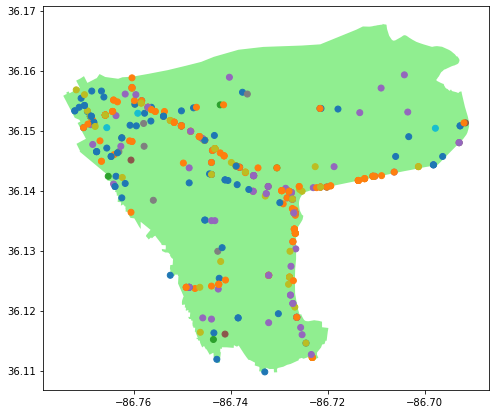

In [32]:
ax = polygon37210.plot(figsize = (8, 10), color = 'lightgreen')
accidents_in_37210.plot( ax = ax, column = 'Collision Type Description');
plt.show()

In [34]:
polygon37210.geometry.centroid

C:\Users\mrmoy\AppData\Local\Temp\ipykernel_13828\2749811052.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37210.geometry.centroid


47    POINT (-86.73347 36.14429)
dtype: geometry

In [35]:
center = polygon37210.geometry.centroid[47]
print(center)

POINT (-86.73347305052175 36.14428881863284)


C:\Users\mrmoy\AppData\Local\Temp\ipykernel_13828\3915129547.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37210.geometry.centroid[47]


In [36]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

In [37]:
print(area_center)

[36.144288818632845, -86.73347305052175]


In [38]:
map_37210 = folium.Map(location =  area_center, zoom_start = 12)
map_37210

In [39]:
i = 0
for row_index, row_values in accidents_in_37210.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 15
values are:
 
Accident Number                                      20220001354
Date and Time                                     1/1/2022 22:51
Number of Fatalities                                           0
Property Damage                                              NaN
Hit and Run                                                False
Collision Type Description            SIDESWIPE - SAME DIRECTION
Street Address                                     MM 212 3 I 40
City                                                   NASHVILLE
State                                                         TN
ZIP                                                      37210.0
RPA                                                       8206.0
Precinct                                                  HERMIT
Latitude                                                 36.1447
Longitude                                               -86.7399
Mapped Location                         POINT (-86.7399 36.1447)

In [63]:
#draw our zip code area: 37207
map_37210 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37210).add_to(map_37210)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in accidents_in_37210.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['Collision Type Description'])
    icon=folium.Icon(color="blue",icon="car", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37210)
#map_37210.save('../maps/map37207.html')

#display our map
map_37210

Ok so now I'm going to make a map that makes the icons a bit more manageable.

In [64]:
cluster_map_37210 = folium.Map(location =  area_center, zoom_start = 13)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_37210)

folium.GeoJson(polygon37210).add_to(cluster_map_37210)

# inside the loop add each marker to the cluster
for row_index, row_values in accidents_in_37210.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['Collision Type Description'])
    icon=folium.Icon(color="blue",icon="car", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
#cluster_map_37210.save('../maps/cluster37207.html')

cluster_map_37210 